自编码器图像识别与生成
> Author Bilibili@YUzUY https://space.bilibili.com/234830645  
> Reference and modified by Catcolia  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# load data set
import numpy as np

with np.load("mnist.npz", allow_pickle=True) as f:
    x_train, y_train = f["x_train"], f["y_train"]
    x_test, y_test = f["x_test"], f["y_test"]

print(f)

NpzFile 'object' with keys: x_test, x_train, y_train, y_test


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 117 247 253 198  10]
 [  0   0   0   0   0   0   0   0   0   0   0   0  76 247 253 231  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 128 253 253 144   0   0]
 [  0   0   0   0   

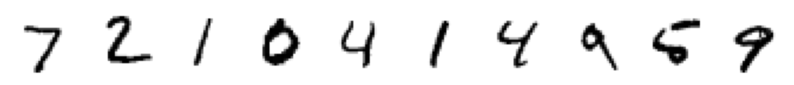

In [3]:
# test for data set
print(type(x_train), type(x_test))
print(x_train.shape, x_test.shape)

plt.figure(figsize=(10,10))

for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i],cmap='binary')
    plt.axis('off')

arr = [x for x in range(0,10)]

print(x_test[1,:,0:18])


In [5]:
x_train_reshaped = x_train.reshape(x_train.shape[0],-1)
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)
x_train_reshaped.shape, x_test_reshaped.shape

((60000, 784), (10000, 784))

In [6]:
# 归一化（像素值都是0-255的，归一化为0-1之间的数）
x_train_normalized = tf.cast(x_train_reshaped, tf.float32) / 255
x_test_normalized = tf.cast(x_test_reshaped, tf.float32) / 255

    tf.cast()函数的作用是执行 tensorflow 中张量数据类型转换，比如读入的图片如果是int8类型的，一般在要在训练前把图像的数据格式转换为float32。

In [15]:
input_size = 784
hidden_size = 32
output_size = 784

In [21]:
input_layer = tf.keras.layers.Input(shape=(input_size,))

# encode, 全连接层
encode_layer = tf.keras.layers.Dense(hidden_size,activation='sigmoid')(input_layer)

# decode, 全连接层
decode_layer = tf.keras.layers.Dense(output_size,activation='sigmoid')(encode_layer)

model = tf.keras.Model(inputs=input_layer, outputs=decode_layer)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
model.compile(optimizer='adam',loss='mse')

In [25]:
model.fit(x_train_normalized,x_train_normalized,epochs=2000,batch_size=2048,shuffle=True,validation_data=(x_test_normalized,x_test_normalized))

Epoch 1/2000
30/30 [==============================] - 0s 10ms/step - loss: 0.1826 - val_loss: 0.1225
Epoch 2/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0970 - val_loss: 0.0817
Epoch 3/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0770 - val_loss: 0.0741
Epoch 4/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0725 - val_loss: 0.0716
Epoch 5/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0707 - val_loss: 0.0703
Epoch 6/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0697 - val_loss: 0.0696
Epoch 7/2000
30/30 [==============================] - 0s 8ms/step - loss: 0.0691 - val_loss: 0.0691
Epoch 8/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0688 - val_loss: 0.0688
Epoch 9/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0685 - val_loss: 0.0686
Epoch 10/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.0683 - val_loss: 0.068

KeyboardInterrupt: 

In [26]:
model.layers
# 输入层
# 隐藏层(Encoder)
# 输出层(Decoder)

In [27]:
# Encoder
encoder = tf.keras.Model(inputs=input_layer, outputs=encode_layer)

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(hidden_size,))
decoder_outputs = model.layers[-1](decoder_inputs)
decoder = tf.keras.Model(inputs=decoder_inputs, outputs=decoder_outputs)

# save model
encoder.save("minst_encoder.h5")
decoder.save("minst_decoder.h5")

/Users/catcolia/anaconda3/envs/NN/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Load model
encoder = tf.keras.models.load_model("minst_encoder.h5")
decoder = tf.keras.models.load_model("minst_decoder.h5")

In [29]:
# 调用encoder把测试集数据压缩为32维向量
test_set_encoded = encoder.predict(x_test_normalized)
test_set_encoded.shape

313/313 [==============================] - 0s 957us/step


(10000, 32)

In [30]:
# 调用decoder把向量解码回图像
test_set_decoded = decoder.predict(test_set_encoded)
test_set_decoded.shape

313/313 [==============================] - 0s 823us/step


(10000, 784)

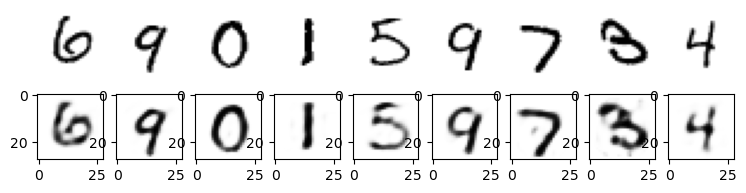

In [31]:
# show result of test set
plt.figure(figsize=(10,2))

for i in range(11,20):
    ax = plt.subplot(2, 10, i-10)
    plt.imshow(x_test[i],cmap='binary')
    plt.axis('off')
    ax = plt.subplot(2, 10, i)
    plt.imshow(test_set_decoded[i].reshape(28,28),cmap='binary')
    plt.axis('on')